In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


In [2]:
maps = pd.read_csv(
    "../outputs/stats_maps_non_cpg.tsv", sep="\t", usecols=["csq", "maps", "ci95"]
)

In [3]:
maps["csq"] = pd.Categorical(
    maps["csq"],
    categories=[
        "synonymous",
        "missense",
        "nonsense",
        "nmd_target",
        "long_exon",
        "distal_nmd",
        "start_proximal",
    ][::-1],
)
maps = maps.sort_values("csq", ascending=True)

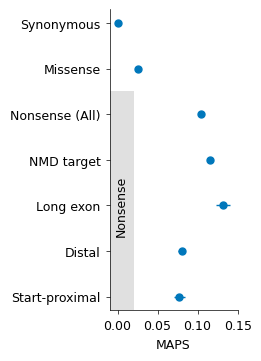

In [7]:
def plot_maps(df, ax):
    ax.errorbar(y=df["csq"], x=df["maps"], xerr=df["ci95"], linestyle="None")
    ax.scatter(y=df["csq"], x=df["maps"])
    ax.set_xlabel("MAPS")
    ax.set_xlim(-0.01, 0.15)
    ax.set_xticks([0, 0.05, 0.1, 0.15])
    ax.set_yticks(
        ticks=[
            "synonymous",
            "missense",
            "nonsense",
            "nmd_target",
            "long_exon",
            "distal_nmd",
            "start_proximal",
        ],
        labels=[
            "Synonymous",
            "Missense",
            "Nonsense (All)",
            "NMD target",
            "Long exon",
            "Distal",
            "Start-proximal",
        ],
        # rotation=90,
        ha="right",
        # rotation_mode="anchor"
    )

    # A custom textbox labelling nonsense variants
    axw = ax.bbox.width
    axh = ax.bbox.height
    rectangle = patches.Rectangle((-0.01,-0.5), 0.03, 5, fc=adjust_lightness(C.grey, 1.2),)
    rx, ry = rectangle.get_xy()
    cx = rx + rectangle.get_width() / 2
    cy = ry + rectangle.get_height() / 2
    ax.add_patch(rectangle)
    ax.annotate("Nonsense", xy=(cx, cy), ha="center", va="center", rotation=90)

    # ax.text(
    #     x=0,
    #     y=0,
    #     s="\n".join(list("Nonsense")),
    #     transform=ax.transAxes,
    #     va="bottom",
    #     ha="left",
    #     bbox=dict(boxstyle="square", lw=0, pad=0.22),
    # )


fig, ax = plt.subplots(figsize=(2.5, 3.5), layout="constrained")
plot_maps(maps, ax)